In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
from circuit_knitting.cutting.instructions import CutWire
from circuit_knitting.cutting import cut_wires, expand_observables
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import PassManager
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import EstimatorV2, SamplerV2
from circuit_knitting.utils.simulation import ExactSampler

exact_sampler = ExactSampler()

from circuit_knitting.cutting import (
    partition_problem,
    generate_cutting_experiments,
    reconstruct_expectation_values,
)
from qiskit.transpiler.passes.scheduling import (
    ASAPScheduleAnalysis,
    PadDynamicalDecoupling,
)
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary as sel
from qiskit.transpiler.passes import BasisTranslator
from qiskit.circuit.library import XGate, YGate, CXGate
service = QiskitRuntimeService()

from qiskit.circuit.classical import expr   # allows classical logic on mid circuit measurement

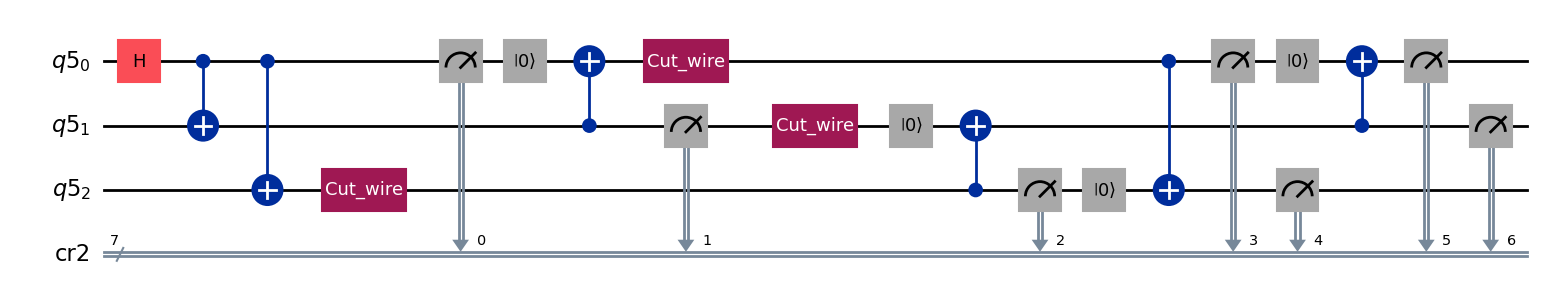

In [6]:
# 7 qubit GHZ state
num_qubit=3
qr=QuantumRegister(num_qubit) 
cr2=ClassicalRegister(7,name="cr2") 
qc=QuantumCircuit(qr,cr2)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.append(CutWire(), [2])
qc.measure(qr[0],cr2[0])
qc.reset(0)
qc.cx(1,0)
qc.append(CutWire(), [0])
qc.measure(qr[1],cr2[1])
qc.append(CutWire(), [1])
qc.reset(1)
qc.cx(2,1)
qc.measure(qr[2],cr2[2])
qc.reset(2)
qc.cx(0,2)
qc.measure(qr[0],cr2[3])
qc.measure(qr[2],cr2[4])
qc.reset(0)
qc.cx(1,0)
qc.measure(qr[0],cr2[5])
qc.measure(qr[1],cr2[6])
qc.draw("mpl")

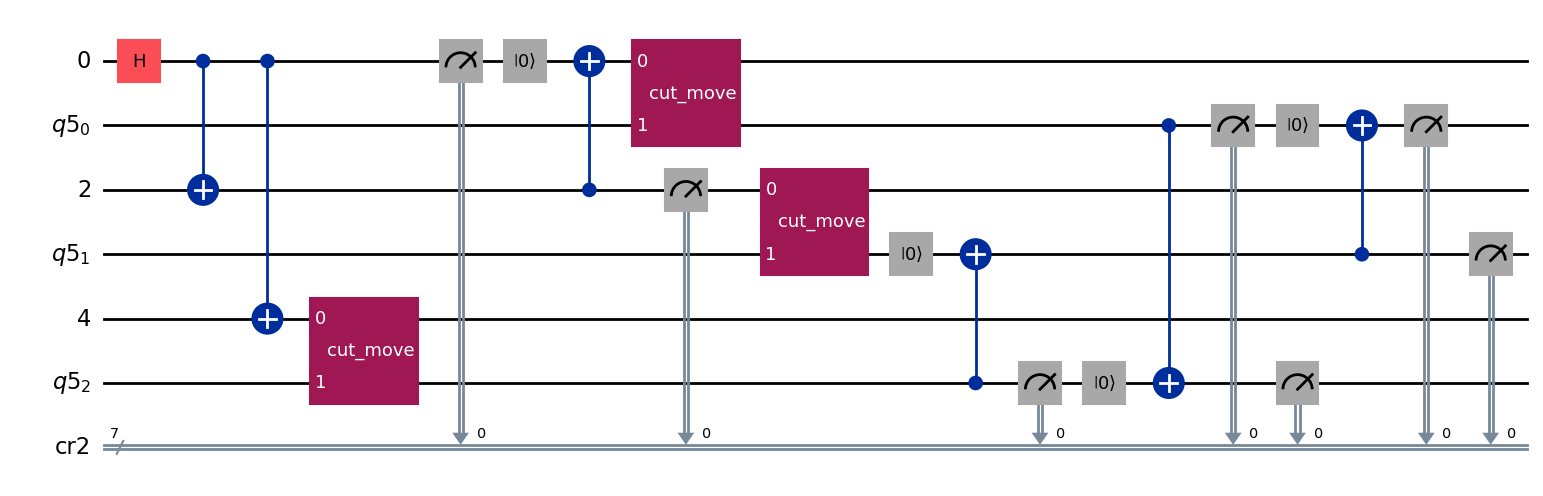

In [7]:
observable = SparsePauliOp(["ZIIIIII"])
qc_1 = cut_wires(qc)
qc_1.draw("mpl")

In [8]:
observable_expanded_paulis = expand_observables(observable.paulis, qc, qc_1)
observable_expanded_paulis

ValueError: The `observables` and `original_circuit` must have the same number of qubits. (7 != 3)

In [11]:
partitioned_problem = partition_problem(
    circuit=qc_1
)
subcircuits = partitioned_problem.subcircuits
subobservables = partitioned_problem.subobservables
subobservables

ValueError: Circuits input to partition_problem should contain no classical registers or bits.

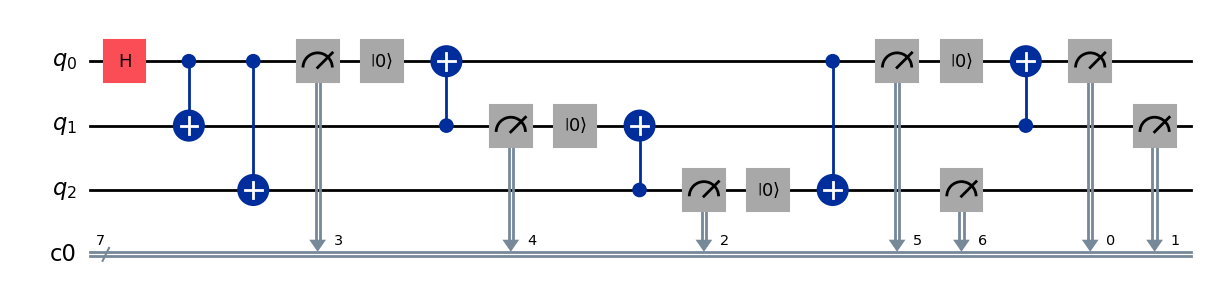

In [10]:
# These errors can be solved in pronciple.
# Then We also don't have code to unroll the subcircuits involving resets